<a href="https://colab.research.google.com/github/tanvir-152/Thesis_Codes/blob/main/gcn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import tensorflow as tf
import math

def random_mini_batches_GCN(X, Y, L, mini_batch_size, seed):

    m = X.shape[0]
    mini_batches = []
    np.random.seed(seed)

    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation, :]
    shuffled_Y = Y[permutation, :].reshape((m, Y.shape[1]))
    shuffled_L1 = L[permutation, :].reshape((L.shape[0], L.shape[1]), order = "F")
    shuffled_L = shuffled_L1[:, permutation].reshape((L.shape[0], L.shape[1]), order = "F")

    num_complete_minibatches = math.floor(m / mini_batch_size)

    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size, :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size, :]
        mini_batch_L = shuffled_L[k * mini_batch_size : k * mini_batch_size + mini_batch_size, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y, mini_batch_L)
        mini_batches.append(mini_batch)
    mini_batch = (X, Y, L)
    mini_batches.append(mini_batch)

    return mini_batches

def random_mini_batches_GCN1(X, X1, Y, L, mini_batch_size, seed):

    m = X.shape[0]
    mini_batches = []
    np.random.seed(seed)

    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation, :]
    shuffled_X1 = X1[permutation, :]
    shuffled_Y = Y[permutation, :].reshape((m, Y.shape[1]))
    shuffled_L1 = L[permutation, :].reshape((L.shape[0], L.shape[1]), order = "F")
    shuffled_L = shuffled_L1[:, permutation].reshape((L.shape[0], L.shape[1]), order = "F")

    num_complete_minibatches = math.floor(m / mini_batch_size)

    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size, :]
        mini_batch_X1 = shuffled_X1[k * mini_batch_size : k * mini_batch_size + mini_batch_size, :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size, :]
        mini_batch_L = shuffled_L[k * mini_batch_size : k * mini_batch_size + mini_batch_size, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_X1, mini_batch_Y, mini_batch_L)
        mini_batches.append(mini_batch)
    mini_batch = (X, X1, Y, L)
    mini_batches.append(mini_batch)

    return mini_batches

def random_mini_batches(X1, X2, Y, mini_batch_size, seed):

    m = X1.shape[0]
    m1 = X2.shape[0]
    mini_batches = []
    np.random.seed(seed)

    permutation = list(np.random.permutation(m))
    shuffled_X1 = X1[permutation, :]
    shuffled_Y = Y[permutation, :].reshape((m, Y.shape[1]))

    permutation1 = list(np.random.permutation(m1))
    shuffled_X2 = X2[permutation1, :]

    num_complete_minibatches = math.floor(m1/mini_batch_size)

    mini_batch_X1 = shuffled_X1
    mini_batch_Y = shuffled_Y

    for k in range(0, num_complete_minibatches):
        mini_batch_X2 = shuffled_X2[k * mini_batch_size : k * mini_batch_size + mini_batch_size, :]
        mini_batch = (mini_batch_X1, mini_batch_X2, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches

def random_mini_batches_single(X1, Y, mini_batch_size, seed):

    m = X1.shape[0]
    mini_batches = []
    np.random.seed(seed)

    permutation = list(np.random.permutation(m))
    shuffled_X1 = X1[permutation, :]
    #shuffled_X2 = X2[permutation, :]
    shuffled_Y = Y[permutation, :].reshape((m, Y.shape[1]))

    num_complete_minibatches = math.floor(m/mini_batch_size)

    for k in range(0, num_complete_minibatches):
        mini_batch_X1 = shuffled_X1[k * mini_batch_size : k * mini_batch_size + mini_batch_size, :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size, :]
        mini_batch = (mini_batch_X1, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches


def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [4]:

#import library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as v1
#tf.disable_v2_behavior()
tf.compat.v1.disable_eager_execution()
import tensorflow as tf
import scipy.io as scio
import scipy.io as sio
#from tf_utils import random_mini_batches, convert_to_one_hot
from tensorflow.python.framework import ops



In [5]:
import keras

print(keras.__version__)



2.12.0


In [6]:
def sample_mask(idx, l):
    """Create mask."""
    mask = np.zeros(l)
    mask[idx] = 1
    return np.array(mask, dtype=np.bool)

In [7]:
def create_placeholders(n_x, n_y):

    isTraining = v1.placeholder_with_default(True, shape=())
    x_in = v1.placeholder(tf.float32,  [None, n_x], name = "x_in")
    y_in = v1.placeholder(tf.float32, [None, n_y], name = "y_in")
    mask_train = v1.placeholder(tf.float32, name = "mask_train")
    mask_test = v1.placeholder(tf.float32, name = "mask_test")
    lap = v1.placeholder(tf.float32, [None, None], name = "lap")

    return x_in, y_in, lap, mask_train, mask_test, isTraining

In [8]:
def initialize_parameters():

    v1.set_random_seed(1)

    x_w1 = v1.get_variable("x_w1", [200,128], initializer = tf.keras.initializers.GlorotUniform(seed = 1))
    x_b1 = v1.get_variable("x_b1", [128], initializer = v1.zeros_initializer())

    x_w2 = v1.get_variable("x_w2", [128,16], initializer = tf.keras.initializers.GlorotUniform(seed = 1))
    x_b2 = v1.get_variable("x_b2", [16], initializer = v1.zeros_initializer())


    parameters = {"x_w1": x_w1,
                  "x_b1": x_b1,
                  "x_w2": x_w2,
                  "x_b2": x_b2}

    return parameters


In [9]:
def GCN_layer(x_in, L_, weights):

    x_mid = tf.matmul(x_in, weights)
    x_out = tf.matmul(L_, x_mid)

    return x_out

In [10]:
def mynetwork(x, parameters, Lap, isTraining, momentums = 0.9):

    with tf.name_scope("x_layer_1"):

         x_z1_bn = v1.layers.batch_normalization(x, momentum = momentums, training = isTraining)
         x_z1 = GCN_layer(x_z1_bn, Lap, parameters['x_w1']) + parameters['x_b1']
         x_z1_bn = v1.layers.batch_normalization(x_z1, momentum = momentums, training = isTraining)
         x_a1 = tf.nn.relu(x_z1_bn)

    with tf.name_scope("x_layer_2"):

         x_z2_bn = v1.layers.batch_normalization(x_a1, momentum = momentums, training = isTraining)
         x_z2 = GCN_layer(x_z2_bn, Lap, parameters['x_w2']) + parameters['x_b2']

    l2_loss =  tf.nn.l2_loss(parameters['x_w1']) + tf.nn.l2_loss(parameters['x_w2'])

    return x_z2, l2_loss

In [11]:
def mynetwork_optimaization(y_est, y_re, l2_loss, mask, reg, learning_rate, global_step):

    with tf.name_scope("cost"):
         cost = (tf.nn.softmax_cross_entropy_with_logits(logits = y_est, labels = y_re)) +  reg * l2_loss
         mask = tf.cast(mask, dtype = tf.float32)
         mask /= tf.reduce_mean(mask)
         cost *= mask
         cost = tf.reduce_mean(cost) +  reg * l2_loss

    with tf.name_scope("optimization"):
         update_ops = v1.get_collection(v1.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(update_ops):
         optimizer = v1.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost,  global_step=global_step)
         optimizer = v1.group([optimizer, update_ops])

    return cost, optimizer

In [12]:
def masked_accuracy(preds, labels, mask):

      correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(labels, 1))
      accuracy = tf.cast(correct_prediction, "float")
      mask = tf.cast(mask, dtype = tf.float32)
      mask /= tf.reduce_mean(mask)
      accuracy *= mask

      return tf.reduce_mean(accuracy)

In [13]:
def train_mynetwork(x_all, y_all, L_all, mask_in, mask_out, learning_rate = 0.001, beta_reg = 0.001, num_epochs = 200, print_cost = True):

    ops.reset_default_graph()
    (m, n_x) = x_all.shape
    (m, n_y) = y_all.shape

    costs = []
    costs_dev = []
    train_acc = []
    val_acc = []

    x_in, y_in, lap, mask_train, mask_test, isTraining = create_placeholders(n_x, n_y)

    parameters = initialize_parameters()

    with tf.name_scope("network"):
         x_out, l2_loss = mynetwork(x_in, parameters, lap, isTraining)

    global_step = tf.Variable(0, trainable=False)

    with tf.name_scope("optimization"):
         cost, optimizer = mynetwork_optimaization(x_out, y_in, l2_loss, mask_train, beta_reg, learning_rate, global_step)

    with tf.name_scope("metrics"):
         accuracy_train = masked_accuracy(x_out, y_in, mask_train)
         accuracy_test= masked_accuracy(x_out, y_in, mask_test)

    init = v1.global_variables_initializer()

    with v1.Session() as sess:

        sess.run(init)
        # Do the training loop
        for epoch in range(num_epochs + 1):

            _, epoch_cost, epoch_acc = sess.run([optimizer, cost, accuracy_train], feed_dict={x_in: x_all, y_in: y_all, lap: L_all, mask_train: mask_in, mask_test: mask_out, isTraining: True})

            if print_cost == True and epoch % 50 == 0:
                features, overall_cost_dev, overall_acc_dev = sess.run([x_out, cost, accuracy_test], feed_dict={x_in: x_all, y_in: y_all, lap: L_all, mask_train: mask_in, mask_test: mask_out, isTraining: False})
                print ("epoch %i: Train_loss: %f, Val_loss: %f, Train_acc: %f, Val_acc: %f" % (epoch, epoch_cost, overall_cost_dev, epoch_acc, overall_acc_dev))

            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                train_acc.append(epoch_acc)
                costs_dev.append(overall_cost_dev)
                val_acc.append(overall_acc_dev)

        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.plot(np.squeeze(costs_dev))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        # plot the accuracy
        plt.plot(np.squeeze(train_acc))
        plt.plot(np.squeeze(val_acc))
        plt.ylabel('accuracy')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        return parameters , val_acc, features


<ipython-input-6-e5061697bc65>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(mask, dtype=np.bool)
<ipython-input-10-6e3bb4e63d84>:5: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  x_z1_bn = v1.layers.batch_normalization(x, momentum = momentums, training = isTraining)
Instructions for updating:
Colocations handled automatically by placer.
<ipython-input-10-6e3bb4e63d84>:7: UserWarning: `tf.l

epoch 0: Train_loss: 4.633223, Val_loss: 2.620063, Train_acc: 0.007663, Val_acc: 0.231024
epoch 50: Train_loss: 0.513281, Val_loss: 0.571579, Train_acc: 0.898851, Val_acc: 0.232678
epoch 100: Train_loss: 0.404183, Val_loss: 0.424545, Train_acc: 0.927970, Val_acc: 0.240434
epoch 150: Train_loss: 0.343033, Val_loss: 0.361378, Train_acc: 0.947127, Val_acc: 0.254912
epoch 200: Train_loss: 0.300046, Val_loss: 0.312224, Train_acc: 0.961686, Val_acc: 0.254188


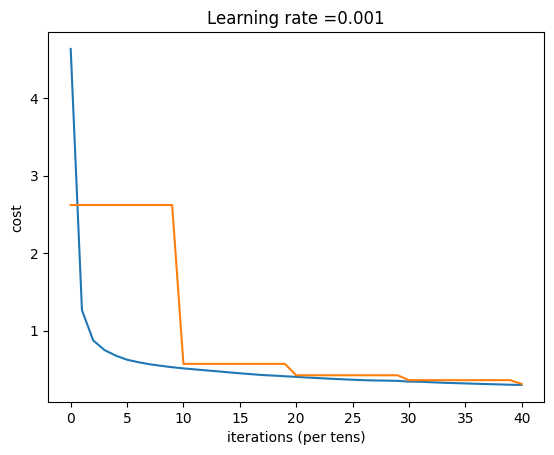

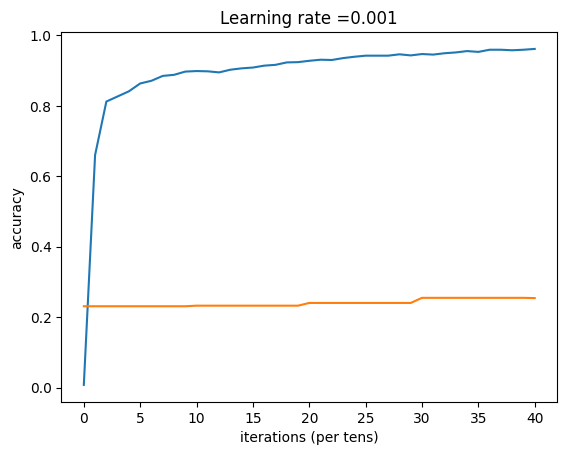

Parameters have been trained!


In [14]:

ALL_X = scio.loadmat('/content/drive/MyDrive/ALL_X.mat')
ALL_Y = scio.loadmat('/content/drive/MyDrive/ALL_Y.mat')
ALL_L = scio.loadmat('/content/drive/MyDrive/ALL_L.mat')

ALL_L = ALL_L['ALL_L']
ALL_X = ALL_X['ALL_X']
ALL_Y = ALL_Y['ALL_Y']

GCN_mask_TR = sample_mask(np.arange(695,2000), ALL_Y.shape[0])
GCN_mask_TE = sample_mask(np.arange(696,10366), ALL_Y.shape[0])

ALL_Y = convert_to_one_hot(ALL_Y - 1, 16)
ALL_Y = ALL_Y.T


parameters, val_acc, features = train_mynetwork(ALL_X, ALL_Y, ALL_L.todense(), GCN_mask_TR, GCN_mask_TE)
sio.savemat('features.mat', {'features': features})
